In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import datetime
from sklearn.model_selection import train_test_split




In [3]:
# Read the data 

Logs = pd.read_csv('logs.csv')
amps = pd.read_csv('amp_data.txt', header=None)
volts = pd.read_csv('voltage_data.txt', header=None)


# Make a copy, to prevent changes in the original dataset 
amp = amps.copy()
volt = volts.copy()
volt.head()

,0,1
0,1554076800000,593.0
1,1554077100000,592.0
2,1554077400000,593.6
3,1554077700000,592.0
4,1554078000000,592.3000000000001


In [4]:
# Column 0 represents Unix time for both amps and volts

unix = amp[0]

# This converts the Unix time into a Datetime format 
# The following Converts to 

x = pd.to_datetime(pd.Series(np.asarray(unix, dtype='datetime64[ms]')))


# Convert the time into United States Central time

central_time = x.dt.tz_localize("UTC").dt.tz_convert('US/Central')

amp['Date'] = central_time

# Sanity: check if the Values from Unix values from AMPS and Volts 
# are the same 

sum(amp[0] == volt[0]) == len(amp[0])


# Combine Amps and Volts together 

amp = amp.rename(columns = {1:'Ampere'})

he = [str(i).replace(" ","") for i in volt[1]]

# found the mistake, some values of in the amps are actually saved as 'None'


In [5]:
# There are some values

volt1 = volt[[j!='None'for j in he]]

volt = np.array(volt1[1], dtype = float)


In [6]:
# 
cl = [str(i).replace(" ","") for i in amp['Ampere']]

# Add the Voltage and Ampere columns

amp1 = amp[[k!='None' for k in cl]]
amp1['Ampere'] = np.array(amp1['Ampere'], dtype = float)
amp1['Voltage'] = volt
amp1.head()



/Users/germa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/germa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,0,Ampere,Date,Voltage
0,1554076800000,686.70,2019-03-31 19:00:00-05:00,593.0
1,1554077100000,684.08,2019-03-31 19:05:00-05:00,592.0
2,1554077400000,654.49,2019-03-31 19:10:00-05:00,593.6
3,1554077700000,670.80,2019-03-31 19:15:00-05:00,592.0
4,1554078000000,651.67,2019-03-31 19:20:00-05:00,592.3


In [7]:
amp_and_vol = amp1
amp_and_vol = amp_and_vol.drop(columns = [0])

# Make a copy of the original data 

modified_log = Logs.copy()
modified_log = modified_log.drop(columns = 'Unnamed: 0')


# ts: is in ts(timestime: in central time)
# Battery: positive values stand for charging 

modified_log['ts'] = pd.to_datetime(pd.Series(np.asarray(modified_log['ts'], dtype='datetime64[s]')))
# This is to match the correct 
# data format from Logs
amp_and_vol['Date'] = pd.to_datetime(amp_and_vol['Date'].dt.strftime(('%B %d, %Y, %r')))




In [8]:
# Let's join the data based on the DataFrame where we know the State of Charge

# There are values where we don't have Amps and Voltage for the original data
# The original values with SOC is 40427, but not all SOC have AMPS and Volts
# We will drop these values: After dropping missing values, we have 34627 rows left 


modified = modified_log.join(amp_and_vol.set_index('Date'), on='ts').dropna().reset_index(drop=True)





## Train Test Split 

In [9]:
# Separate the data into Train and Test set 
X = modified 

X = X.rename(columns = {'Battery': 'Battery(kW)', 'building': 'Building(kW)', 'Adjusted Load': 'Adjusted Load (kW)'})


# Drop the rows in which the building has Negative Power

X = X[X['Building(kW)']>0]

# Separate the data into 2 sets

X_train, X_test = train_test_split(X, test_size=0.20, random_state=42)

# Reset the Indexes 

X_train = X_train.sort_values(by = ['ts']).reset_index(drop=True).set_index('ts')
X_test = X_test.sort_values(by=['ts']).reset_index(drop=True).set_index('ts')
X_train



,Battery(kW),State of Charge,Total Net Load (Sum of All Loads excluding Battery),Building(kW),Adjusted Load (kW),Ampere,Voltage
ts,,,,,,,
2019-06-01 04:15:00,-22.800101,0.572250,1975.492339,1975.492339,1952.692237,2111.85,583.6
2019-06-01 04:30:00,139.599885,0.585636,1976.813313,1976.813313,2116.413198,2167.47,582.3
2019-06-01 04:45:00,-7.200152,0.583871,1995.591711,1995.591711,1988.391559,2029.17,583.4
2019-06-01 05:00:00,-513.599510,0.527619,1945.208337,1945.208337,1431.608827,1403.33,586.8
2019-06-01 05:15:00,128.401671,0.542111,1978.229553,1978.229553,2106.631224,2208.09,581.9
2019-06-01 05:30:00,184.000045,0.559628,1942.975593,1942.975593,2126.975638,1445.85,585.0
2019-06-01 06:30:00,-605.998278,0.451547,2002.793807,2002.793807,1396.795529,1067.67,593.7
2019-06-01 06:45:00,72.000620,0.460816,2039.896896,2039.896896,2111.897516,956.84,592.1
2019-06-01 07:00:00,139.999758,0.474080,2019.496471,2019.496471,2159.496229,977.53,590.2


### The following is used to make graph for each hour of the day and day of the week


In [10]:


datetime_index1 = pd.to_datetime(X_train.index)
rt = []

#Create the plots for the week and hour of the day 

d = pd.DataFrame(index= X_train.index)
d['State of Charge'] = X_train['State of Charge'] #bldg.split()[0]
#d['week'] = datetime_index1.week
d['DoW'] = datetime_index1.weekday
d['HoD'] = datetime_index1.hour
rt.append(d)

# Concatenate 
da = pd.concat(rt, ignore_index = True)
da.head()




,State of Charge,DoW,HoD
0,0.572250,5,4
1,0.585636,5,4
2,0.583871,5,4
3,0.527619,5,5
4,0.542111,5,5


## Comparing the Mean and Median

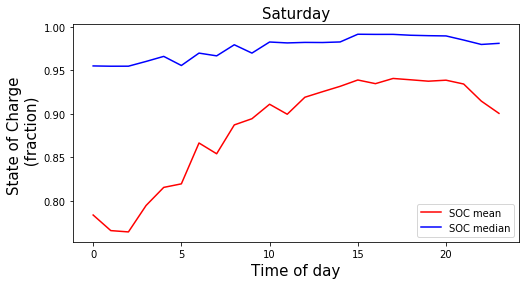

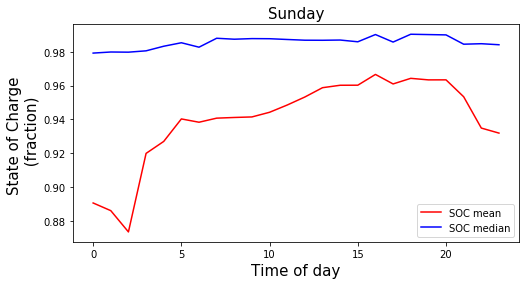

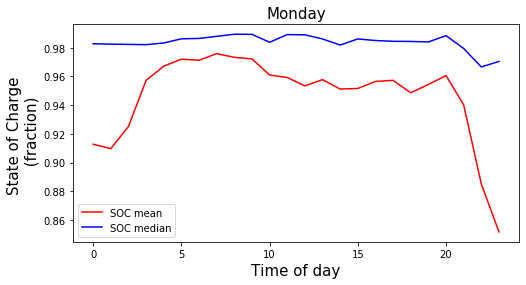

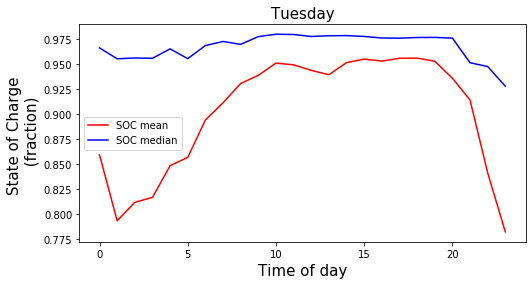

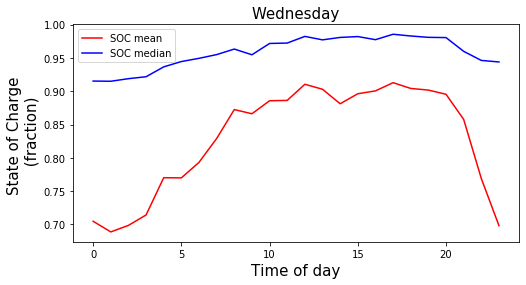

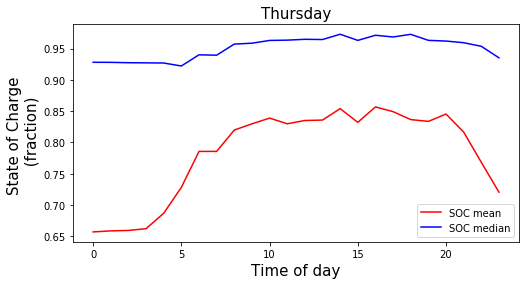

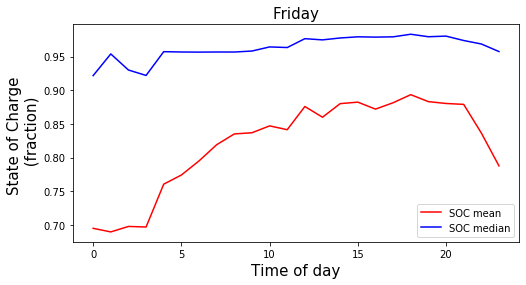

In [11]:
days_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for i in da['DoW'].unique():
    idx = da['DoW']== i
    fig, ax = plt.subplots(figsize = (8,4))
    #Plot mean load shape across all weeks 
    da[idx].groupby('HoD')['State of Charge'].mean().plot(ax = ax, legend=False, color = 'red')
    da[idx].groupby('HoD')['State of Charge'].median().plot(ax = ax, legend=False, color = 'blue')
    ax.legend(['SOC mean','SOC median'])
    ax.set_xlabel('Time of day', fontsize = 15)
    ax.set_ylabel('State of Charge \n (fraction)',fontsize = 15)
    ax.set_title(days_of_week[i], fontsize = 15)
    plt.show()





In [12]:
# Average Model and True Values 


P_b = da.groupby(['DoW','HoD'])['State of Charge'].mean()
test_data = X_test[['State of Charge']]
test_data['DoW'] = test_data.index.weekday
test_data['HoD'] = test_data.index.hour 
grouped = test_data.groupby(['DoW','HoD'])['State of Charge'].mean()

# Create the True Values and Average Model 
P_hat = pd.DataFrame(index = grouped.index)
P_hat['True values'] = grouped
P_hat['Average Model'] = P_b
from sklearn.metrics import mean_absolute_error

/Users/germa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/germa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


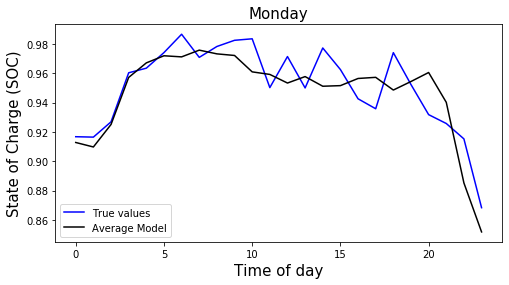

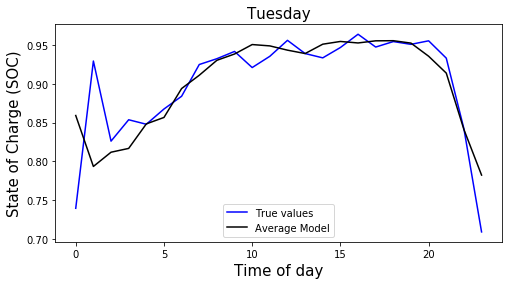

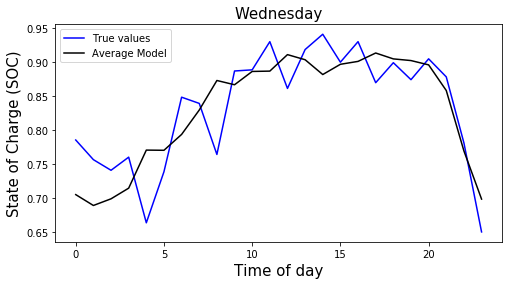

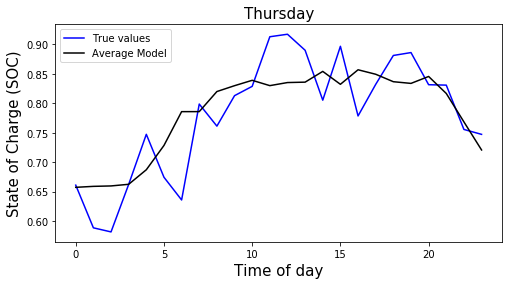

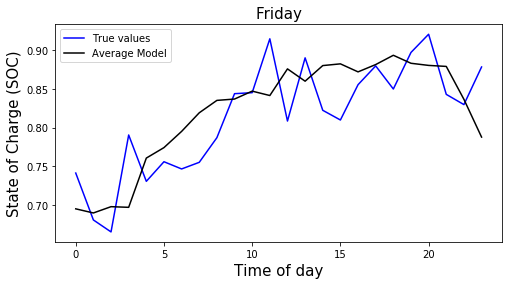

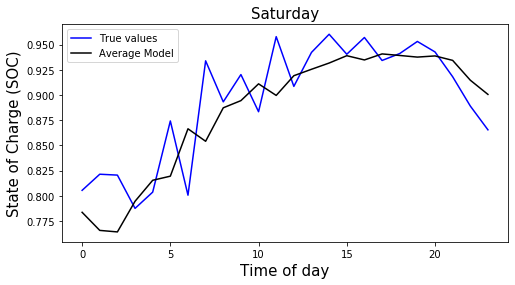

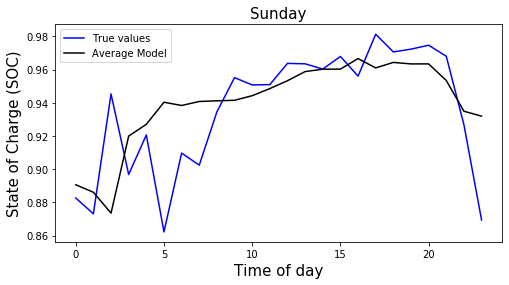

In [13]:
# Plots for the day of the week 

days_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for day in range(7):
    fig, ax = plt.subplots(figsize=(8,4))
    P_hat.xs(day).plot(ax=ax, color =['b','black'])
    ax.set_xlabel('Time of day', fontsize = 15)
    ax.set_ylabel('State of Charge (SOC)', fontsize = 15)
    ax.set_title(days_of_week[day], fontsize = 15)
    ax.legend()
    plt.show()





In [14]:
mean_error = P_hat['True values'] - P_hat['Average Model']



In [15]:
mae = pd.DataFrame(np.abs(mean_error)).groupby(level=0).mean().rename(columns = {0:'MAE Model'})
# The day with the lowest MAE is Monday
mae

,MAE Model
DoW,
0,0.012686
1,0.023547
2,0.038944
3,0.046184
4,0.039551
5,0.027321
6,0.019258


### Correlation Plotting

In [16]:

#nor = sklearn.preprocessing.normalize(np.array(X['Building(kW)']).reshape(1,-1), norm = 'l2')

# Create a new column
X_train['Hour'] = X_train.index.hour


In [17]:
# Some plots to see if there is some correlatiosn

# import seaborn as sns
# from scipy.stats import stats

# def corrfunc(x, y, **kws):
#     r, _ = stats.pearsonr(x, y)
#     ax = plt.gca()
#     ax.annotate("r = {:.2f}".format(r),
#                 xy=(.1, .6), xycoords=ax.transAxes,
#                size = 24)
    
# cmap = sns.cubehelix_palette(light=1, dark = 0.1,
#                              hue = 0.5, as_cmap=True)

# sns.set_context(font_scale=2)

# # Pair grid set up

# this = X_train[['State of Charge','Building(kW)','Ampere','Voltage','Hour']]

# g = sns.PairGrid(this)
# # Scatter plot on the upper triangle
# # g.map_upper(plt.scatter, s=10, color = 'red')

# # Distribution on the diagonal


# # Density Plot and Correlation coefficients on the lower triangle
# g.map_lower(sns.kdeplot, cmap = cmap)
# g.map_lower(corrfunc);


# # Finding the if there are some correlations




### Nonlinear autoregressive exogenous model

Exogenous inputs (the model relates the current value of a time)

1. Past values of the same series 
2. Current and past values of the driving (exogenous) series — that is, of the externally determined series that influences the series of interest.


documentation on how to use NARX in Python:

https://firets.readthedocs.io/en/latest/models.html

parameters:

https://pypi.org/project/fireTS/


In [18]:
# Separate the train data further to train and test 

In [19]:
# Separate the Train data again


In [45]:
from sklearn.linear_model import LinearRegression
from fireTS.models import NARX
from sklearn.ensemble import RandomForestRegressor
from fireTS.models import DirectAutoRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_tr = X_train[['State of Charge']]
y = X_train['State of Charge']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_tr,y, test_size = 0.2)

mdl = NARX(RandomForestRegressor(n_estimators=10), auto_order=2, exog_order=[2])

mdl.fit(X_train1, y_train1)

# Use 1 time step to make predictions
ft = pd.Series(mdl.predict(X_test1,y_test1, step = 5))[24:1000]



In [46]:
# Use 1 time step

MSE: 0.24873399305343297
R_squared:  -1.0023998341947222


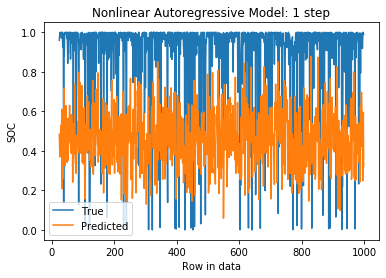

In [47]:
tr = y_train1[24:1000].values

x = np.arange(24,1000)

plt.plot(x,tr)
plt.plot(x,ft)
plt.ylabel('SOC')
plt.xlabel('Row in data')
plt.title('Nonlinear Autoregressive Model: 1 step')
plt.legend(['True','Predicted'])
print("MSE:", mean_squared_error(tr,ft))
print("R_squared: ",  mdl.score(np.array(tr).reshape(-1,1),ft, method = 'r2'))



MSE: 0.25828965752884536
R_squared:  0.6696780076701965


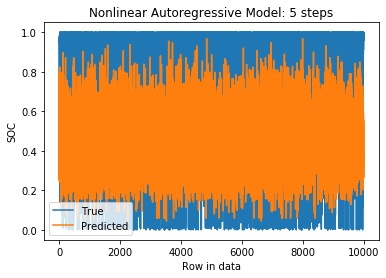

In [49]:
ft2 = pd.Series(mdl.predict(X_train1,y_train1, step = 5))[6:10000]
tr2 = y_train1[6:10000].values
x = np.arange(6,10000)
plt.plot(x,tr2)
plt.plot(x,ft2)
plt.ylabel('SOC')
plt.xlabel('Row in data')
plt.title('Nonlinear Autoregressive Model: 5 steps')
plt.legend(['True','Predicted',])
print("MSE:", mean_squared_error(tr2,ft2))
print("R_squared: ", mdl.score(np.array(tr2).reshape(-1,1),ft2, method = 'r2'))




In [50]:
X['deltaSOC'] = X[['State of Charge']].diff(1, axis=0)['State of Charge']


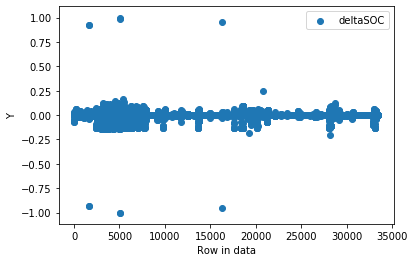

In [51]:
# Recommend 
plt.scatter(np.arange(len(X)),X['deltaSOC'][0:len(X)])
#plt.plot(np.arange(len(X)),X['State of Charge'][0:len(X)])
plt.xlabel('Row in data')
plt.ylabel('Y')
plt.legend(['deltaSOC'])
#plt.title('SOC and deltaSOC')




In [52]:
# Times in which battery is lower than -0.2
100*np.mean(X['deltaSOC'])



0.0012519776809173937

Text(0.5, 1.0, 'Power')

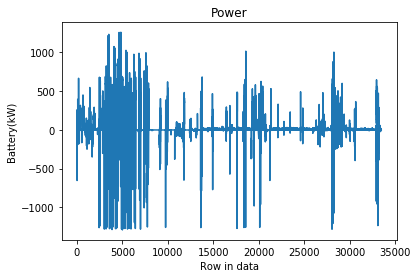

In [53]:
plt.plot(np.arange(len(X)),X['Battery(kW)'][0:len(X)])
plt.ylabel('Battery(kW)')
plt.xlabel('Row in data')
plt.title('Power')


Text(0.5, 1.0, 'Power')

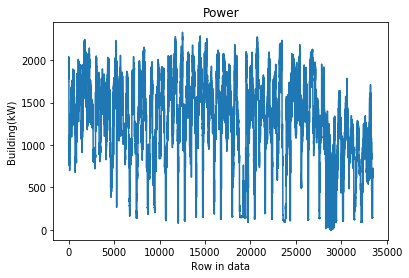

In [54]:
plt.plot(np.arange(len(X)),X['Building(kW)'][0:len(X)])
plt.ylabel('Building(kW)')
plt.xlabel('Row in data')
plt.title('Power')



Text(0.5, 1.0, 'Current')

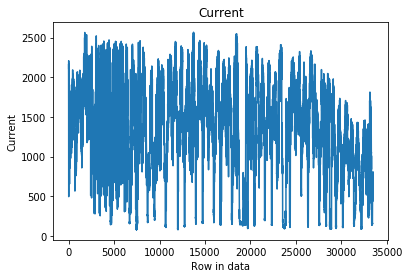

In [55]:
plt.plot(np.arange(len(X)),X['Ampere'][0:len(X)])
plt.ylabel('Current')
plt.xlabel('Row in data')
plt.title('Current')




## First need to install NN in your computer 

In [56]:
import neuralnetwork.FeedForward
from neuralnetwork.FeedForward import FeedForward

# Dropping the first row in data

X_new = X.copy()
X_new = X_new.iloc[1:]


In [57]:
# Install neural network 
# Features Total Net Load (Sum of All Loads excluding Battery)= 
X_stats = X_new.describe()
X_stats = X_stats.transpose()


## How to randomly generate values for each month



In [58]:
def norm(data):
    """Returns an """
    return (data - X_stats['mean'])/X_stats['std']

def norm3(data):
    return (2*(data - X_stats['min'])/(X_stats['max']-X_stats['min']) - 1)


In [59]:
# normalizing the data 
norm3(X_new.drop(columns = 'ts'))

X_normalized = norm3(X_new.drop(columns = 'ts'))


In [60]:
X_normalized.head()

,Battery(kW),State of Charge,Total Net Load (Sum of All Loads excluding Battery),Building(kW),Adjusted Load (kW),Ampere,Voltage,deltaSOC
1,0.121377,0.171272,0.697911,0.697911,0.813409,0.678746,0.091142,0.013388
2,0.006420,0.167741,0.714041,0.714041,0.712926,0.567783,0.119384,-0.001765
3,-0.390134,0.055239,0.670763,0.670763,0.275912,0.065651,0.206675,-0.056255
4,0.112608,0.084222,0.699128,0.699128,0.805731,0.711337,0.080873,0.014493
5,0.156146,0.119256,0.668845,0.668845,0.821699,0.099766,0.160462,0.017518


In [61]:
X['Year'] = X['ts'].dt.year
X['Week'] = X['ts'].dt.week
X['Hour'] = X['ts'].dt.hour
X['Day'] = X['ts'].dt.weekday

In [62]:
group = X.groupby(['Year','Week','Day']).count()


In [63]:
# We have 358 days worth of data 

ty = X[X['Week']==23]

ty[X['Day']==3]




/Users/germa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Battery(kW),State of Charge,Total Net Load (Sum of All Loads excluding Battery),ts,Building(kW),Adjusted Load (kW),Ampere,Voltage,deltaSOC,Year,Week,Hour,Day
459,0.000000,0.995694,1804.371576,2019-06-06 00:00:00,1804.371576,1804.371576,1839.53,583.4,-0.000026,2019,23,0,3
460,0.400004,0.995680,1850.625828,2019-06-06 00:15:00,1850.625828,1851.025832,1800.75,586.7,-0.000014,2019,23,0,3
461,0.000000,0.995634,1831.426420,2019-06-06 00:30:00,1831.426420,1831.426420,1830.21,586.7,-0.000045,2019,23,0,3
462,0.400005,0.995647,1827.047468,2019-06-06 00:45:00,1827.047468,1827.447473,1764.53,587.5,0.000013,2019,23,0,3
463,-8.799982,0.994731,1722.654645,2019-06-06 01:00:00,1722.654645,1713.854663,1804.63,586.7,-0.000917,2019,23,1,3
464,-0.399976,0.994689,1686.017697,2019-06-06 01:15:00,1686.017697,1685.617721,1822.61,585.7,-0.000041,2019,23,1,3
465,-0.799979,0.994604,1754.753940,2019-06-06 01:30:00,1754.753940,1753.953961,1832.37,586.6,-0.000085,2019,23,1,3
466,2.400024,0.994840,1792.091732,2019-06-06 01:45:00,1792.091732,1794.491756,1776.90,587.4,0.000236,2019,23,1,3
467,0.800015,0.994932,1811.006188,2019-06-06 02:00:00,1811.006188,1811.806203,1728.62,589.1,0.000092,2019,23,2,3
468,9.999998,0.995915,1793.047697,2019-06-06 02:15:00,1793.047697,1803.047694,1804.48,588.0,0.000982,2019,23,2,3


#### This will capture true reprentation


In [64]:
# Check the number of days we have for each week
# If the number is 7 days, return rand(4), and rest goes to testing

# If the number is 6 days, return ra(4 train), 2 testing
# If the number is 5 days, return ra(3 train), 2 tesing
# If the number is 4 days, return ra(2 train), 2 testing
# If the # is 3 days, return ra(2 train), 1 testing 
# If the # is 2 days, return ra(1 train), 1 testing


# Do for each year

# Check for the actual percentage for training and testing 

#Send to Preet

# Create a function


# def splitData(dat):



In [65]:
# Training a NN

# Do it in Matlab ()

# 
# Send percentage
# Need to know the neurons, loss function, activation, layers


X['deltaSOC'].iloc[0] = X['deltaSOC'].iloc[1]

/Users/germa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [66]:
gr = X[['Year','Week','Day']].groupby(['Year','Week']).size()



In [67]:
#X[['Year','Week','Day']].groupby(['Year','Week']).size()

# Do it for 1 year first 
Z = X

CV = Z.groupby(['Year','Week','Day']).size(
).index.get_level_values(1).value_counts()


tu = pd.DataFrame(CV).rename(columns = {'Week':'values'})

X = X.join(tu, on = 'Week')


In [68]:
# The following is hard-coding 

In [69]:

bo = (X['Year']==2019) & (X['Week']==22)
nt = (X['Year']==2020) & (X['Week']==22)


In [70]:
X.loc[bo, 'values'] = 2
X.loc[nt, 'values'] = 7

In [71]:
X['date'] = X['ts'].dt.strftime("%Y-%m-%d")


In [72]:
MN = X
bv = MN[['Week', 'values','date']].apply(tuple, axis=1)
MN['Triple'] = bv 

bv2 =  MN[['Week', 'values']].apply(tuple, axis = 1)
MN['Pairs'] = bv2


In [73]:
# This is important 


L = MN['Triple'].unique()




In [74]:
# [list(j) for j in bv.unique()]

#[i[1] for i in bv.unique()]
#MN['date'].unique()

el = pd.DataFrame({'We':[x[0] for x in L], 'Va': [x[1] for x in L], 'Date': [x[2] for x in L]})




In [75]:
tr = pd.DataFrame(el.groupby(['We','Va']).apply(lambda x: list(x['Date'])))

 


In [76]:
table = pd.pivot_table(el, values= 'Date', index=['We'],
                    columns=['Va'], aggfunc = lambda x: list(x))



In [77]:
tr.iloc[23]



0    [2019-06-03, 2019-06-04, 2019-06-05, 2019-06-0...
Name: (23, 7), dtype: object

In [78]:
zero = tr.index.get_level_values(0)


In [79]:
one = tr.index.get_level_values(1)
one
gt = pd.DataFrame({'X':zero, 'Y':one}).apply(tuple, axis=1)

gt.values

array([(1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7),
       (9, 7), (10, 7), (11, 7), (12, 7), (13, 7), (14, 7), (15, 7),
       (16, 7), (17, 7), (18, 7), (19, 7), (20, 7), (21, 7), (22, 2),
       (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (28, 7),
       (29, 7), (30, 7), (31, 7), (32, 7), (33, 7), (34, 7), (35, 7),
       (36, 7), (37, 7), (38, 7), (39, 2), (40, 6), (41, 7), (42, 7),
       (43, 7), (44, 7), (45, 7), (46, 7), (47, 7), (48, 7), (49, 7),
       (50, 7), (51, 7), (52, 5)], dtype=object)

In [80]:
tr['Pairs'] = gt.values

In [81]:
tr = tr.reset_index(drop=True).rename(columns = {0: 'lstDates'})



In [82]:
# The following is how we are separating the data 
we = [x[0] for x in tr['Pairs']]
days = [x[1] for x in tr['Pairs']]

np.arange(len(we))


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [83]:
def trainSplit(dat):
    """Returns: dates that are suppose to go with
       train data"""
    np.random.seed(40)
    train = []
    we = [x[0] for x in dat['Pairs']] # the number of weeks
    days = [x[1] for x in dat['Pairs']] # the number of days
    ch = np.random.choice
    for i,j in zip(np.arange(len(we)), days):
        if j == 2:
            train.extend(ch(dat.iloc[i]['lstDates'], 1, replace = False))
            #Weeks with 2 days: extend 1 dates
       
        elif j == 5:
            train.extend(ch(dat.iloc[i]['lstDates'], 3, replace = False))
             #Weeks with 5 days: extend 3 dates
        
        elif j == 6:
            train.extend(ch(dat.iloc[i]['lstDates'], 3, replace = False))
            #Weeks with 6 days: extend 3 dates
        
        else:
            train.extend(ch(dat.iloc[i]['lstDates'], 5, replace = False))
            #Weeks with 7 days: extend 5 days
    return train




In [84]:
# iterate through the pairs column and get select random dates from

# lstDates column
train_dates = trainSplit(tr)


In [85]:
# The following is the dataframe for training

training_data = MN[MN['date'].isin(train_dates)]

100*(len(training_data)/len(MN))


70.65726998536745

In [86]:
# The following is for testing data
testing_data = MN[MN['date'].isin(train_dates)==False]


Text(0.5, 1.0, 'Training: Current')

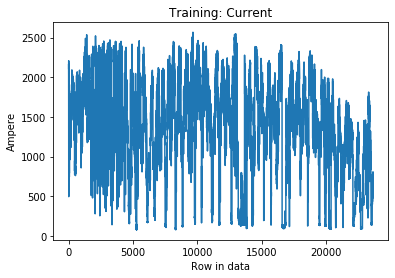

In [87]:
plt.plot(np.arange(len(training_data)),training_data['Ampere'][0:len(training_data)])
plt.ylabel('Ampere')
plt.xlabel('Row in data')
plt.title('Training: Current')


Text(0.5, 1.0, 'Testing: Current')

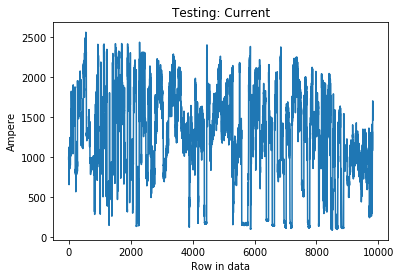

In [88]:
plt.plot(np.arange(len(testing_data)),testing_data['Ampere'][0:len(testing_data)])
plt.ylabel('Ampere')
plt.xlabel('Row in data')
plt.title('Testing: Current')



In [89]:
# plt.scatter(np.arange(len(testing_data)),testing_data['deltaSOC'][0:len(testing_data)])
# plt.ylabel('Units in Decimal')
# plt.xlabel('Row in data')
# plt.title('Testing: deltaSOC')



Text(0.5, 1.0, 'Testing: deltaSOC')

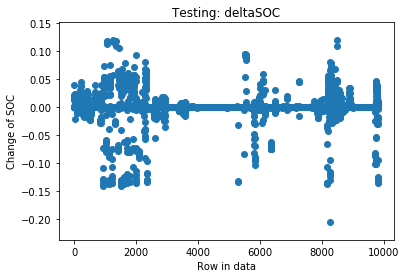

In [90]:
plt.scatter(np.arange(len(testing_data)),testing_data['deltaSOC'][0:len(testing_data)])
plt.ylabel('Change of SOC')
plt.xlabel('Row in data')
plt.title('Testing: deltaSOC')




Text(0.5, 1.0, 'Training: deltaSOC')

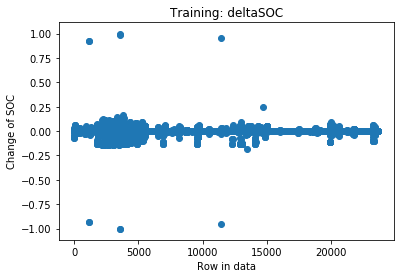

In [91]:
plt.scatter(np.arange(len(training_data)),training_data['deltaSOC'][0:len(training_data)])
plt.ylabel('Change of SOC')
plt.xlabel('Row in data')
plt.title('Training: deltaSOC')



Text(0.5, 1.0, 'Training: SOC')

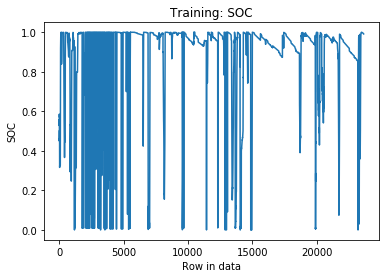

In [92]:
plt.plot(np.arange(len(training_data)),training_data['State of Charge'][0:len(training_data)])
plt.ylabel('SOC')
plt.xlabel('Row in data')
plt.title('Training: SOC')



Text(0.5, 1.0, 'Testing: SOC')

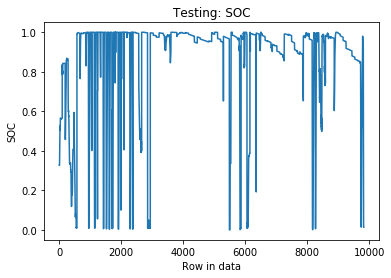

In [93]:
plt.plot(np.arange(len(testing_data)),testing_data['State of Charge'][0:len(testing_data)])
plt.ylabel('SOC')
plt.xlabel('Row in data')
plt.title('Testing: SOC')


## Install Neural Network
#### $ pip install neuralnetwork

##### How to use NN?

https://pypi.org/project/neuralnetwork/

In [94]:
from neuralnetwork.FeedForward import FeedForward
from neuralnetwork.Sigmoid import Sigmoid
from neuralnetwork.Backpropagation import Backpropagation
import neuralnetwork
import pyneurgen


In [95]:
input_nodes = 2
hidden_nodes = 2
output_nodes = 2

output_order = 3
incoming_weight_from_output = .6
input_order = 2
incoming_weight_from_input = .4

net = neuralnetwork



#### Install Pyneurgen
$ pip install pyneurgen


In [96]:
from sklearn.neural_network import MLPClassifier



In [97]:
# Download the training data into computer,

# MLPClassifier =  multi-layer perceptron 
MLPClassifier(activation = 'sigmoid')


MLPClassifier(activation='sigmoid', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Text(0.5, 1.0, 'Testing: Voltage')

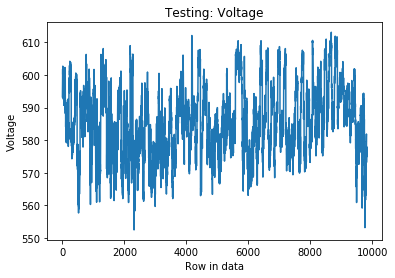

In [98]:
plt.plot(np.arange(len(testing_data)),testing_data['Voltage'][0:len(testing_data)])
plt.ylabel('Voltage')
plt.xlabel('Row in data')
plt.title('Testing: Voltage')


Text(0.5, 1.0, 'Training: Voltage')

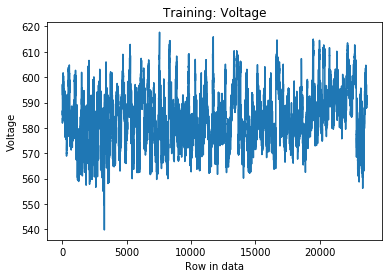

In [99]:
plt.plot(np.arange(len(training_data)),training_data['Voltage'][0:len(training_data)])
plt.ylabel('Voltage')
plt.xlabel('Row in data')
plt.title('Training: Voltage')


### Normalizing the new data



In [100]:
training_data = training_data.reset_index(drop=True)

In [101]:
training_data.iloc[0]['deltaSOC'] = training_data.iloc[1]['deltaSOC']

/Users/germa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
training_data.iloc[0]['deltaSOC'] = training_data.iloc[1]['deltaSOC']


/Users/germa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
# Setting timestamp as index

#training_data = training_data.set_index('ts')
training_data.head()


,Battery(kW),State of Charge,Total Net Load (Sum of All Loads excluding Battery),ts,Building(kW),Adjusted Load (kW),Ampere,Voltage,deltaSOC,Year,Week,Hour,Day,values,date,Triple,Pairs
0,-22.800101,0.572250,1975.492339,2019-06-01 04:15:00,1975.492339,1952.692237,2111.85,583.6,0.013387,2019,22,4,5,2,2019-06-01,"(22, 2, 2019-06-01)","(22, 2)"
1,139.599885,0.585636,1976.813313,2019-06-01 04:30:00,1976.813313,2116.413198,2167.47,582.3,0.013387,2019,22,4,5,2,2019-06-01,"(22, 2, 2019-06-01)","(22, 2)"
2,-7.200152,0.583871,1995.591711,2019-06-01 04:45:00,1995.591711,1988.391559,2029.17,583.4,-0.001765,2019,22,4,5,2,2019-06-01,"(22, 2, 2019-06-01)","(22, 2)"
3,-513.599510,0.527619,1945.208337,2019-06-01 05:00:00,1945.208337,1431.608827,1403.33,586.8,-0.056251,2019,22,5,5,2,2019-06-01,"(22, 2, 2019-06-01)","(22, 2)"
4,128.401671,0.542111,1978.229553,2019-06-01 05:15:00,1978.229553,2106.631224,2208.09,581.9,0.014492,2019,22,5,5,2,2019-06-01,"(22, 2, 2019-06-01)","(22, 2)"


In [104]:
train_matlab = training_data.drop(columns = ['values','date','Triple','Pairs','Year','Total Net Load (Sum of All Loads excluding Battery)'], axis = 1)





In [105]:
# Normalize 



In [106]:
stats2 = train_matlab.describe()
stats2 = stats2.transpose()

In [107]:
def norm4(data):
    return (2*(data - stats2['min'])/(stats2['max']-stats2['min']) - 1)


In [108]:
# Convert data to matlab
train_matlab.to_csv('dat_matlab')



In [109]:
#Try to find packages with NARXNN that is new (python3) tonight

#Check PyTorch, Keras


